## Glass KNN

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
df=pd.read_csv("glass.csv")

In [96]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [98]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [99]:
df.shape

(214, 10)

In [100]:
#Duplicate values
df.duplicated().sum()


1

In [101]:
df=df.drop_duplicates()# Dropping duplicated values	

In [102]:
df.duplicated().sum()

0

In [103]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [104]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


In [105]:
df[df.corr()>85].sum() # No highly correlated Features

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

In [106]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

<AxesSubplot:xlabel='RI'>

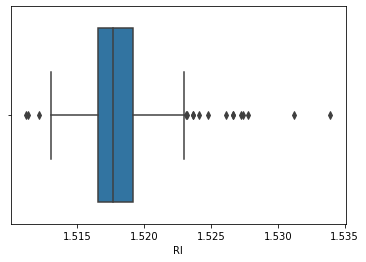

In [107]:
sns.boxplot(df["RI"])

In [72]:
per25=df["RI"].quantile(0.25)
per75=df["RI"].quantile(0.75)
iqr=per75-per25
upper_limit= per75+1.5*iqr
lower_limit= per25+1.5*iqr
print(upper_limit)
print(lower_limit)
# Finding the outliers above upper limit
df[df["RI"]>upper_limit]
#Dropping the outliers from upper limit
df=df[df["RI"]<upper_limit]
#Finding the ouliers below lower limit
df[df["RI"]<lower_limit]
#Dropping the outliers below lower limit
df=df[df["RI"]>lower_limit]


1.5230949999999999
1.520465


In [73]:
df[df["RI"]>upper_limit].sum() # no outliers

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

In [74]:
df[df["RI"]<lower_limit].sum()# no outliers

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

<AxesSubplot:xlabel='Na'>

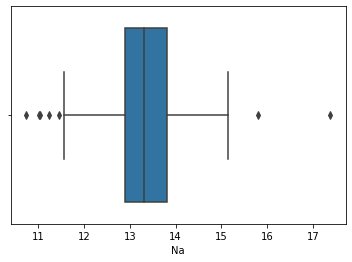

In [108]:
sns.boxplot(df['Na'])

In [76]:
per25=df['Na'].quantile(0.25)
per75=df['Na'].quantile(0.75)
iqr=per75-per25
upper_limit= per75+1.5*iqr
lower_limit= per25+1.5*iqr
print(upper_limit)
print(lower_limit)
# Finding the outliers above upper limit
df[df['Na']>upper_limit]
#Dropping the outliers from upper limit
df=df[df['Na']<upper_limit]
#Finding the ouliers below lower limit
df[df['Na']<lower_limit]
#Dropping the outliers below lower limit
df=df[df['Na']>lower_limit]

15.709999999999999
14.69


In [77]:
df[df['Na']>upper_limit].sum() # no outliers

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

In [78]:
df[df['Na']<lower_limit].sum()# no outliers

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

<AxesSubplot:xlabel='Mg'>

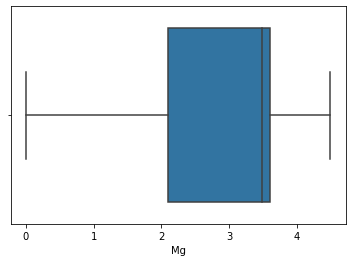

In [109]:
sns.boxplot(df['Mg'])#No outliers

In [80]:
per25=df['Mg'].quantile(0.25)
per75=df['Mg'].quantile(0.75)
iqr=per75-per25
upper_limit= per75+1.5*iqr
lower_limit= per25+1.5*iqr
print(upper_limit)
print(lower_limit)

#Finding the ouliers below lower limit
df[df['Mg']<lower_limit]


2.2
2.2


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


<AxesSubplot:xlabel='Si'>

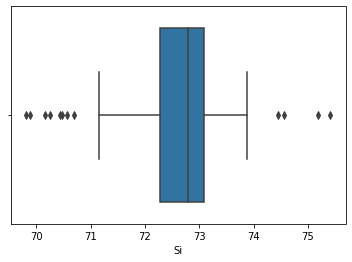

In [110]:
sns.boxplot(df['Si'])

In [82]:
per25=df['Si'].quantile(0.25)
per75=df['Si'].quantile(0.75)
iqr=per75-per25
upper_limit= per75+1.5*iqr
lower_limit= per25+1.5*iqr
print(upper_limit)
print(lower_limit)
# Finding the outliers above upper limit
df[df['Si']>upper_limit]
#Dropping the outliers from upper limit
df=df[df['Si']<upper_limit]
#Finding the ouliers below lower limit
df[df['Si']<lower_limit]
#Dropping the outliers below lower limit
df=df[df['Si']>lower_limit]

70.26
70.26


In [83]:
df[df["Si"]>upper_limit].sum() # no outliers




RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

In [84]:
df[df["Si"]<lower_limit].sum()# no outliers

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

<AxesSubplot:xlabel='K'>

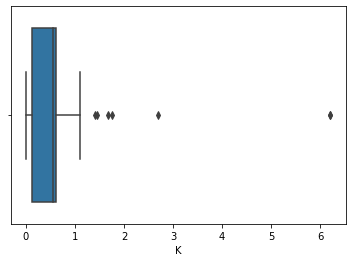

In [111]:
sns.boxplot(df['K'])

In [86]:
per25=df['K'].quantile(0.25)
per75=df['K'].quantile(0.75)
iqr=per75-per25
upper_limit= per75+1.5*iqr
lower_limit= per25+1.5*iqr
print(upper_limit)
print(lower_limit)
# Finding the outliers above upper limit
df[df['K']>upper_limit]
#Dropping the outliers from upper limit
df=df[df['K']<upper_limit]


nan
nan


In [87]:
df[df["K"]>upper_limit].sum() # no outliers

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

<AxesSubplot:xlabel='Ca'>

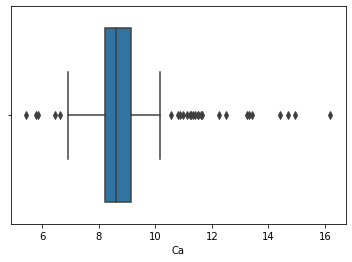

In [112]:
sns.boxplot(df['Ca'])

In [121]:
per25=df['Ca'].quantile(0.25)
per75=df['Ca'].quantile(0.75)
iqr=per75-per25
upper_limit= per75+1.5*iqr
lower_limit= per25+1.5*iqr
print(upper_limit)
print(lower_limit)
# Finding the outliers above upper limit
df[df['Ca']>upper_limit]
#Dropping the outliers from upper limit
df=df[df['Ca']<upper_limit]
#Finding the ouliers below lower limit
df[df['Ca']<lower_limit]
#Dropping the outliers below lower limit
df=df[df['Ca']>lower_limit]

10.009999999999998
9.29


In [122]:
# Finding the outliers above upper limit
df[df['Ca']>upper_limit].sum()



RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

In [124]:
df[df["Ca"]<lower_limit].sum()# no outliers

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

<AxesSubplot:xlabel='Ba'>

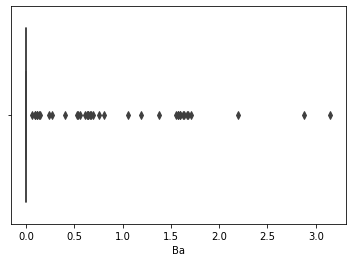

In [113]:
sns.boxplot(df['Ba'])

In [130]:
df.drop(columns=['Ba'],axis=1,inplace=True)

<AxesSubplot:xlabel='Fe'>

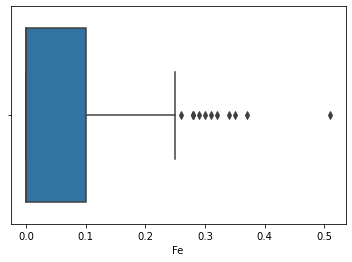

In [114]:
sns.boxplot(df['Fe'])

In [131]:
per25=df['Fe'].quantile(0.25)
per75=df['Fe'].quantile(0.75)
iqr=per75-per25
upper_limit= per75+1.5*iqr
lower_limit= per25+1.5*iqr
print(upper_limit)
print(lower_limit)
# Finding the outliers above upper limit
df[df['Fe']>upper_limit]
#Dropping the outliers from upper limit
df=df[df['Fe']<upper_limit]


0.4125
0.2475


In [133]:

df[df['Fe']>upper_limit].sum() # No outliers

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Fe      0.0
Type    0.0
dtype: float64

In [92]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe


In [93]:
y=df.iloc[:,-1]

In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [136]:
#Dividing Features In X(variables) and Y(Target)
x=df.iloc[:,:-1]
y=df['Type']

In [139]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape


((15, 8), (7, 8), (15,), (7,))

In [140]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)


In [144]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred =knn.predict(xtest)


In [148]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

accuracy_score(ytest,ypred)

0.5714285714285714

In [149]:
confusion_matrix(ytest,ypred)

array([[4, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]], dtype=int64)

In [155]:
recall_score(ytest,ypred,average='macro')

0.25

In [157]:
precision_score(ytest,ypred,average='macro')

0.16666666666666666

In [158]:
f1_score(ytest,ypred,average='macro')

0.2

In [159]:
y.value_counts()

1    10
6     4
2     3
7     3
3     2
Name: Type, dtype: int64

In [170]:
# Selecting optimal value using grid search cv

from sklearn.model_selection import GridSearchCV


n_neighbors = np.array(range(1,1000))
param_grid = dict(n_neighbors=n_neighbors)


In [168]:
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn, param_grid=param_grid)
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  9...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979,

In [169]:
print(grid.best_score_)
print(grid.best_params_)

0.6666666666666666
{'n_neighbors': 1}


In [171]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)
ypred =knn.predict(xtest)

In [172]:
accuracy_score(ytest,ypred)

0.5714285714285714

In [173]:
recall_score(ytest,ypred,average='macro')

0.625

In [174]:
precision_score(ytest,ypred,average='macro')

0.6666666666666666

In [175]:
f1_score(ytest,ypred,average='macro')

0.6428571428571429

In [178]:
print("Precision Score Before Optimization:0.16666666666666666", "Precision Score After Optimization:",precision_score(ytest,ypred,average='macro'))
print("Recall Score Before Optimization: 0.25", "Recall Score After Optimization:",recall_score(ytest,ypred,average='macro'))
print("F1_score Before Optimization:0.2", "F1_score After Optimization:",f1_score(ytest,ypred,average='macro'))
print("Accuracy Score Before Optimization:0.5714285714285714", "Accuracy Score After Optimization:",accuracy_score(ytest,ypred))

Precision Score Before Optimization:0.16666666666666666 Precision Score After Optimization: 0.6666666666666666
Recall Score Before Optimization: 0.25 Recall Score After Optimization: 0.625
F1_score Before Optimization:0.2 F1_score After Optimization: 0.6428571428571429
Accuracy Score Before Optimization:0.5714285714285714 Accuracy Score After Optimization: 0.5714285714285714


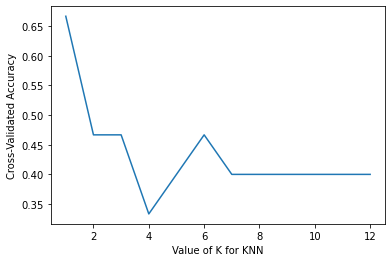

In [179]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, xtrain,ytrain, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()